In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 10
d = 2
s = np.random.randint(1,2*n,(n,d))


In [3]:
k = 3
c = np.random.randint(1,2*n,(k,d))

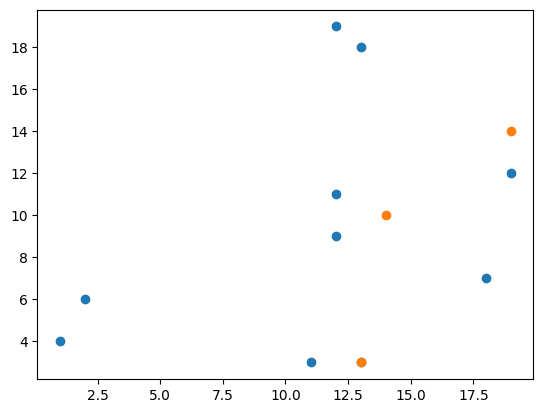

In [4]:
plt.scatter(s[:,0],s[:,1])
plt.scatter(c[:,0],c[:,1])
plt.show()

K Centers

In [5]:
# Method 1 - Complicated

def kCentersCost(s,c):
    p,q = s.shape
    a,b = c.shape
    d = np.zeros((p,a))
    for i in range(p):
        for j in range(a):
            d[i][j] = np.linalg.norm(s[i,:]-c[j])
    cluster_costs_indices = np.argmin(d,axis=1)
    cluster_costs = np.zeros((p,1))
    for i in range(p):
        cluster_costs[i] = d[i,cluster_costs_indices[i]]
    return cluster_costs_indices,max(cluster_costs)[0]
labels,dmax = kCentersCost(s,c)
print(f'Cost:\n{dmax}')

Cost:
12.041594578792296


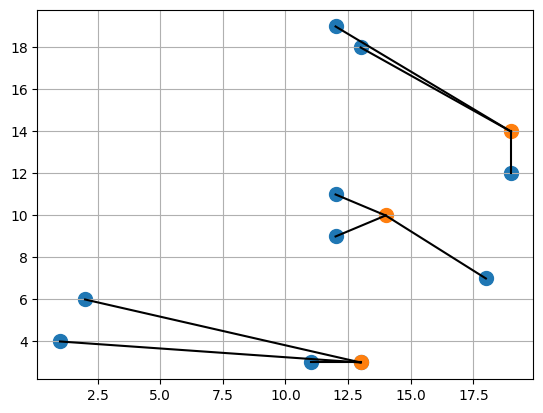

In [6]:
def show(s,c,labels,n):
    for i in range(n):
        plt.plot([s[i,0],c[labels[i],0]],[s[i,1],c[labels[i],1]],'black')
    plt.scatter(s[:,0],s[:,1],s=100)
    plt.scatter(c[:,0],c[:,1],s=100)

show(s,c,labels,n)
plt.grid()
plt.show()

In [7]:
# Method 2 - Easier

def distance(p,c):
    dclosest = np.infty
    for t in c:
        d = np.linalg.norm(p-t)
        if d < dclosest:
            dclosest = d
    return dclosest

def kcentercost(s,c):
    dmax = 0
    for p in s:
        d = distance(p,c)
        dmax = max(d,dmax)
    return dmax

print(kcentercost(s,c))

12.041594578792296


K Means

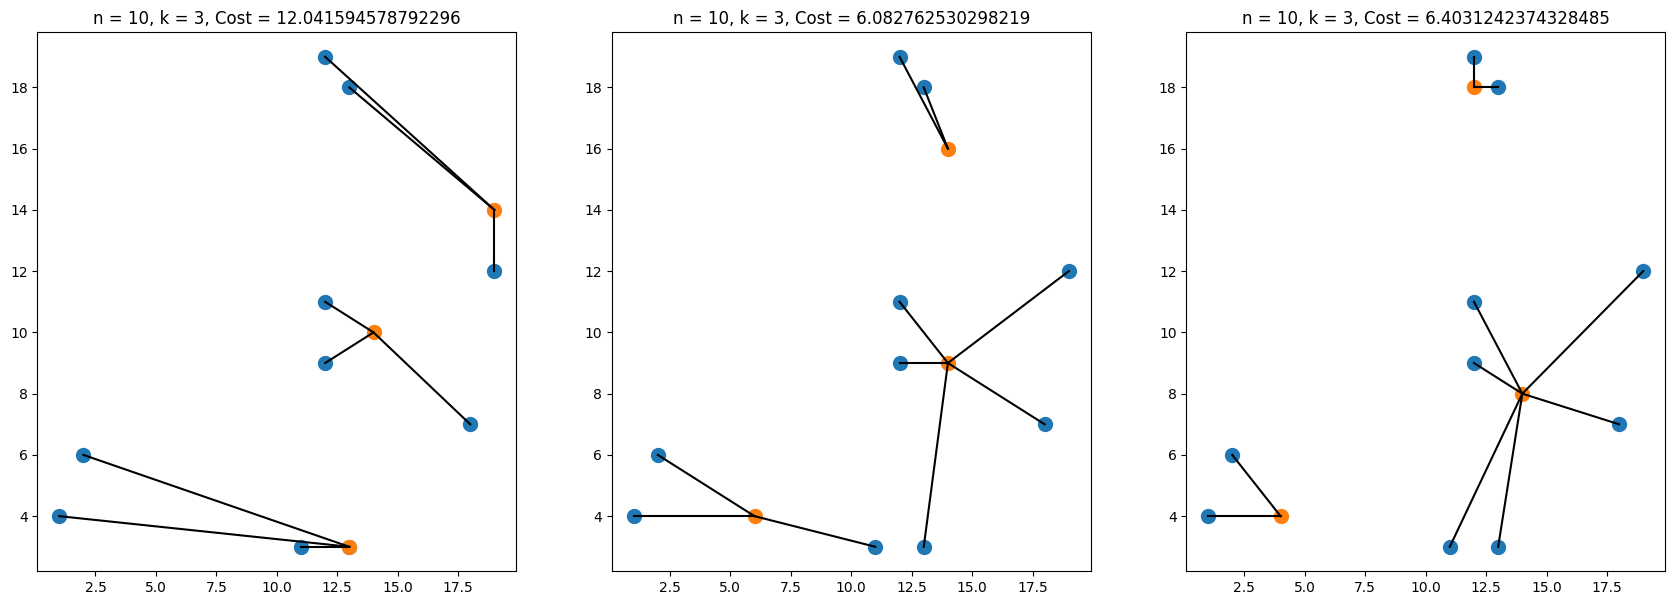

In [8]:
iter = 3
fig,ax = plt.subplots(1,3,figsize=(21,7))
for i in range(iter):
    labels,cost = kCentersCost(s,c)
    plt.subplot(1,3,i+1)
    show(s,c,labels,n)
    plt.title(f'n = {n}, k = {k}, Cost = {cost}')

    for j in range(k):
        c[j] = np.mean(s[labels==j],axis=0) # Concept of Filter Array

In [9]:
a = np.array([[1,2,3],[4,5,6]])
print(np.mean(a,axis=0))
print(np.mean(a,axis=1))

[2.5 3.5 4.5]
[2. 5.]
